In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import ROOT
import ctypes
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style") 
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [2]:
ROOT.gROOT.LoadMacro('/home/jykim/workspace/DRAW_and_FITTING/main/Belle2Style.C')
ROOT.SetBelle2Style()


Applying BELLE2 style settings...


# Pandas

In [3]:
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v16_ref_sig_ext_naive_skim/'
# base_file_loc =  '/media/jykim/T7/storage/01_recon/v26_ref_sig_ext/'

# base_filter =  'D0_M>1.83 && D0_M<1.90 '
# # base_filter += '&& Dstarp_isSignal==1'
# tree = 'ref_phi'

# variables=['D0_M','Dstarp_Q','Dstarp_CMS_p','__ncandidates__','Dstarp_isSignal']
# var = 'D0_M'

base_file_loc =  '/media/jykim/T7/storage/01_recon/ref_optv1_sigext_ref_only_skim/'

base_filter =  'D0_M>1.68 && D0_M<2.05 '
# base_filter += '&& Dstarp_isSignal!=1'
tree = 'ref_omega'

variables=["__experiment__", "__run__", "__event__",'D0_M','Dstarp_Q','Dstarp_CMS_p','__ncandidates__','Dstarp_isSignal','Dstarp_chiProb']
var = 'D0_M'

In [4]:
# ccbar_0 = base_file_loc + 'topo/resultfile/result_ref_phi/standard.root'
# ccbar_0 = base_file_loc + 'topo/generic_ccbar.root'

# ccbar_0 = base_file_loc + 'generic_ccbar.root'

# uubar_0 = base_file_loc + 'generic_uubar.root'
# ddbar_0 = base_file_loc + 'generic_ddbar.root'
# ssbar_0 = base_file_loc + 'generic_ssbar.root'
# charged_0 = base_file_loc + 'generic_charged.root'
# mixed_0 = base_file_loc + 'generic_mixed.root'
# taupair_0 = base_file_loc + 'generic_taupair.root'

ccbar_0 = base_file_loc + 'ccbar/recon_*.root'

uubar_0 = base_file_loc + 'uubar/recon_*.root'
ddbar_0 = base_file_loc + 'ddbar/recon_*.root'
ssbar_0 = base_file_loc + 'ssbar/recon_*.root'
charged_0 = base_file_loc + 'charged/recon_*.root'
mixed_0 = base_file_loc + 'mixed/recon_*.root'
taupair_0 = base_file_loc + 'taupair/recon_*.root'

In [5]:
base_filter = base_filter
varaiables = variables
tree=tree

pd_ccbar_0 = get_pd(file=ccbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_uubar_0 = get_pd(file=uubar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_ddbar_0 = get_pd(file=ddbar_0, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=ssbar_0, tree=tree,base_filter=base_filter,variables=variables)

pd_charged_0 = get_pd(file=charged_0, tree=tree,base_filter=base_filter,variables=variables)

pd_mixed_0 = get_pd(file=mixed_0, tree=tree,base_filter=base_filter,variables=variables)

pd_taupair_0 = get_pd(file=taupair_0, tree=tree,base_filter=base_filter,variables=variables)


In [13]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [14]:
pd_ccbar['rank'] = pd_ccbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_uubar['rank'] = pd_uubar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ddbar['rank'] = pd_ddbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_ssbar['rank'] = pd_ssbar.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_charged['rank'] = pd_charged.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_mixed['rank'] = pd_mixed.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')
pd_taupair['rank'] = pd_taupair.groupby(['__experiment__', '__run__', '__event__', ])['Dstarp_chiProb'].rank(ascending=True, method='first')

In [15]:
multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

1544067
1845189
0.836806961238117


In [16]:
cut = 'D0_M>0.0'

pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[ 35134.  35540.  35795.  36332.  36735.  37242.  37419.  37982.  39173.
  40297.  41231.  42474.  42675.  40808.  38419.  36263.  34824.  35802.
  37559.  41315.  47355.  57192.  71143.  90600. 102446.  90411.  63344.
  42215.  32685.  28747.  26822.  25580.  25291.  25018.  24358.  24156.
  23698.  23365.  22833.  22613.  22191.  21814.  21839.  21631.  21727.
  21259.  20994.  20758.  20203.  19882.]
fitst_bin_entries=35134.0


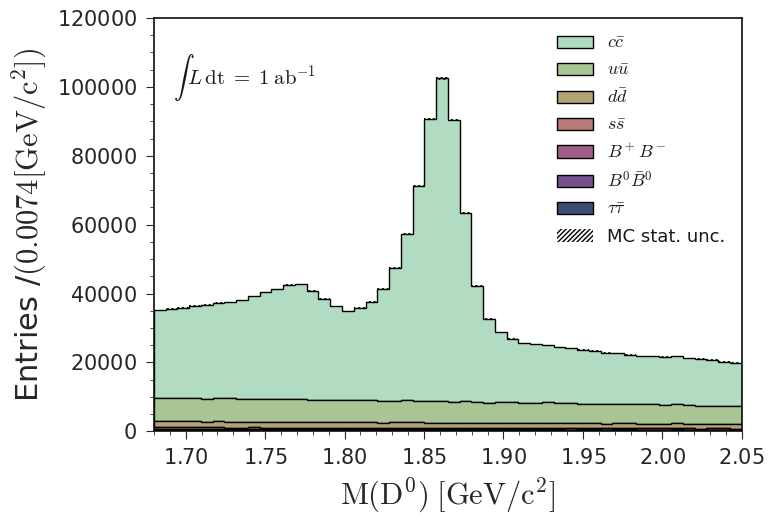

In [18]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",ncol=1,luminosity="$1\; \mathrm{ab}^{-1}$")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/MC15ri_optv1_ref_phi_D0M.png")
# plt.savefig("/media/jykim/T7/saved_plots/references/ref_phi/MC15ri_optv1_ref_phi_D0M_isSignal_not1.png")

In [19]:
pd_all_generic = pd.concat([pd_ccbar, pd_uubar, pd_ddbar, pd_ssbar, pd_charged, pd_mixed, pd_taupair], ignore_index=True)

pd_all_generic.describe()


,__experiment__,__run__,__event__,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal,Dstarp_chiProb,rank
count,1845189.0,1845189.0,1.845189e+06,1.845189e+06,1.845189e+06,1.845189e+06,1.845189e+06,1.329420e+06,1.845189e+06,1.845189e+06
mean,1003.0,0.0,1.313293e+08,1.844911e+00,5.926295e-03,3.164064e+00,1.465498e+00,2.810158e-01,3.623920e-01,1.214144e+00
std,0.0,0.0,8.153949e+07,9.358654e-02,5.339926e-04,5.376971e-01,8.816893e-01,4.494953e-01,2.999680e-01,5.645934e-01
min,1003.0,0.0,2.300000e+01,1.680000e+00,4.929508e-03,2.500000e+00,1.000000e+00,0.000000e+00,1.000031e-03,1.000000e+00
25%,1003.0,0.0,5.942655e+07,1.769828e+00,5.513723e-03,2.726227e+00,1.000000e+00,0.000000e+00,8.471006e-02,1.000000e+00
50%,1003.0,0.0,1.271986e+08,1.848675e+00,5.911092e-03,3.026049e+00,1.000000e+00,0.000000e+00,2.981045e-01,1.000000e+00
75%,1003.0,0.0,2.006131e+08,1.900620e+00,6.348337e-03,3.487534e+00,2.000000e+00,1.000000e+00,6.038582e-01,1.000000e+00
max,1003.0,0.0,3.209988e+08,2.049999e+00,6.929691e-03,6.953290e+00,1.700000e+01,1.000000e+00,9.999982e-01,1.700000e+01


In [12]:
N_isSignal_1 = len(pd_all_generic.query('Dstarp_isSignal==1'))
print(N_isSignal_1)

373588


In [6]:
# pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
# pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)


pd_all_generic = pd.concat([pd_ccbar_0, pd_uubar_0, pd_ddbar_0, pd_ssbar_0, pd_charged_0, pd_mixed_0, pd_taupair_0], ignore_index=True)

pd_all_generic.describe()



,D0_M,Dstarp_Q,Dstarp_CMS_p,__ncandidates__,Dstarp_isSignal
count,29287.000000,29287.000000,29287.000000,29287.000000,28783.000000
mean,1.864299,0.005876,3.532175,1.007239,0.838412
std,0.010304,0.000323,0.532385,0.084774,0.368079
min,1.830004,0.004930,2.750013,1.000000,0.000000
25%,1.860385,0.005724,3.076738,1.000000,1.000000
50%,1.864729,0.005862,3.455348,1.000000,1.000000
75%,1.868742,0.006008,3.924301,1.000000,1.000000
max,1.899996,0.006930,5.188950,2.000000,1.000000


In [8]:
np_data = pd_all_generic['D0_M'].to_numpy()

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [1.83,1.9]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [1.83,1.9]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_extended_model_' created with bounds [1.83,1.9]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_extended_model_) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file test.png has been created


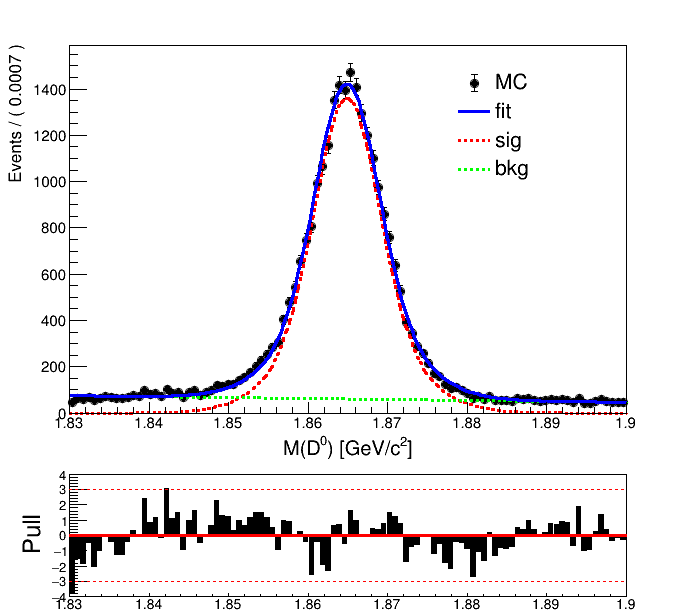

In [11]:
fitting_region = (1.83, 1.90)
x = ROOT.RooRealVar("M(D^{0})", "M(D^{0}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(70)


# rooDataSet = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x))), ("D0_M")
# )
# rooDataSet2 = ROOT_df_start.Book(
#     ROOT.std.move(ROOT.RooDataSetHelper("dataset", "Title of dataset", ROOT.RooArgSet(x, y))), ("D0_M", "Dstarp_Q")
# )


mean = ROOT.RooRealVar("mean", "mean of gaussians", 1.86,1.85, 1.87)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.02,0.001,0.05)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0.001,0.05)
# alpha = ROOT.RooRealVar("alpha", "width of gaussians", 0.5,0,20)
# n_CB = ROOT.RooRealVar("n_CB", "width of gaussians", 20,0,100)
 
# Novo_peak = ROOT.RooRealVar("Novo_peak", "Novo peak", 1.83,1.67,1.93)    
# Novo_width = ROOT.RooRealVar("Novo_widh", "Novo peak", 0.05,0,0.5)    
# Novo_tail = ROOT.RooRealVar("Novo_tail", "Novo peak", 0.5,0,10)    


    
sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)

sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
sig_model = ROOT.RooAddPdf("sig_model", "Signal1", [sig1, sig2], sig1frac)




c0 = ROOT.RooRealVar("c0", "c0",0.1, -1,1)
c1 = ROOT.RooRealVar("c1", "c1",0.5, -1,1)
#c2 = ROOT.RooRealVar("c2", "c2",-0.3, -1.,0.)
bkg_x_model = ROOT.RooPolynomial("bkg_x_model", "Signal component 1", x, ROOT.RooArgList(c0,c1))
#sig = ROOT.RooCBShape("sig2", "Signal component 2", x, mean, sigma2, alpha, n_CB)
# sig3 = ROOT.RooNovosibirsk("sig3", "Signal component 3", x, mean, Novo_width, Novo_tail)





data = ROOT.RooDataSet.from_numpy({"M(D^{0})": np_data}, [x])

# data = rooDataSet

canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

nsig = ROOT.RooRealVar("nsig","# signal events",len(np_data)*0.8,0,len(np_data))
nbkg = ROOT.RooRealVar("nbkg","# bkg events",len(np_data)*0.2,0, len(np_data))

extended_model = ROOT.RooAddPdf("extended_model", "x_model", ROOT.RooArgSet(sig_model,bkg_x_model), ROOT.RooArgSet(nsig, nbkg))


r = extended_model.fitTo(data,NumCPU=12, Range=fitting_region)
# r = sig.fitTo(data,NumCPU=12, Range=fitting_region)

# r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

data.plotOn(frame,Name = "data1", XErrorSize=0)

# sig.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)


# extended_model.plotOn(frame, Name="sig1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=ROOT.kBlue)

# extended_model.plotOn(frame, Name="sig2", Components=sig2, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)


extended_model.plotOn(frame, Name="sig", Components=ROOT.RooArgSet(sig1,sig2), LineStyle=ROOT.kDashed, LineColor=ROOT.kRed)



extended_model.plotOn(frame, Name="bkg", Components=bkg_x_model, LineStyle=ROOT.kDashed, LineColor=ROOT.kGreen)

extended_model.plotOn(frame, Name="fitting")





# sig.paramOn(frame)
frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")

leg1 = ROOT.TLegend(0.65, 0.6, 0.9, 0.85)
# leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(0)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
# leg1.AddEntry("sig1", "sig1", "l")
# leg1.AddEntry("sig2", "sig1", "l")

leg1.AddEntry("sig", "sig", "l")
leg1.AddEntry("bkg", "bkg", "l")
leg1.SetTextSize(0.05)
leg1.SetBorderSize(0)

leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("test.png")

In [12]:
print(nsig)
print(nbkg)


RooRealVar::nsig = 23204 +/- 197.015  L(0 - 29287) 

RooRealVar::nbkg = 6083.15 +/- 147.3  L(0 - 29287) 

